In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans

In [3]:
#Load dataset 
data = pd.read_csv('wine.data.csv')

#Split off features
x = data.iloc[:,1:14]
#Split off classifications
y = data['Label']


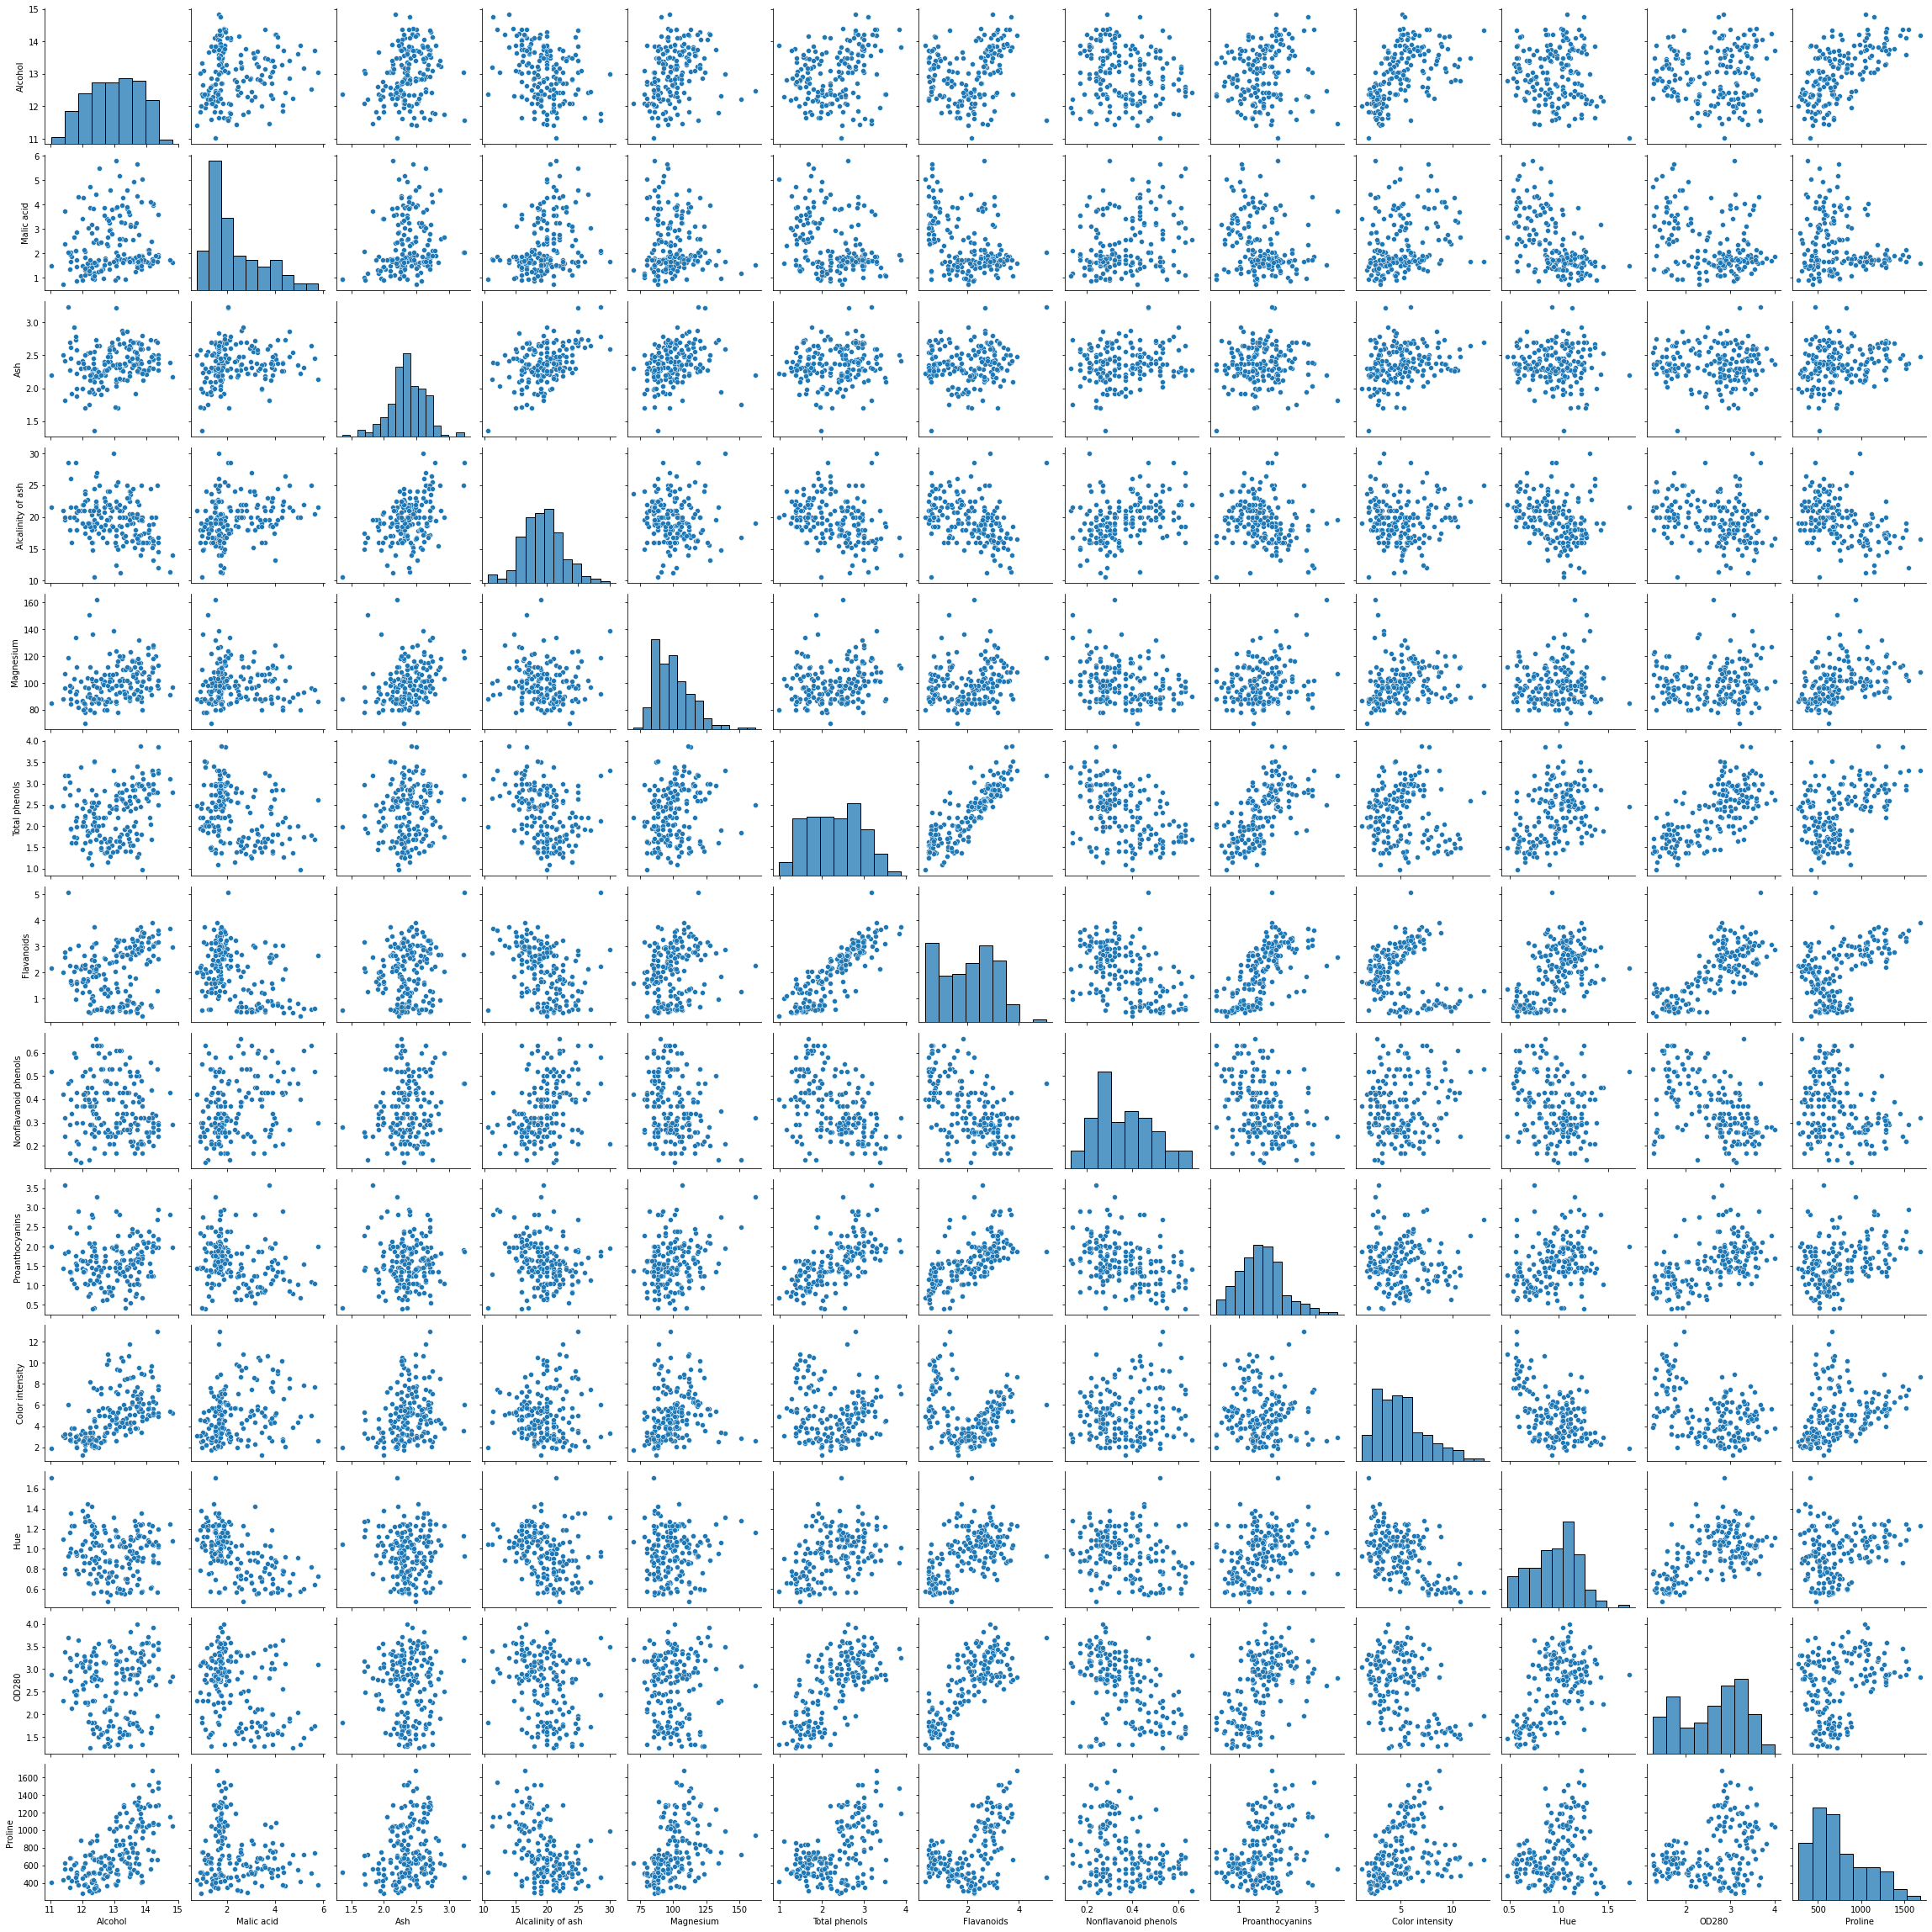

In [4]:
#Use pairplot to plot each attribute against the other 
sns.pairplot(x)

In [5]:
print("Observations:")
print("Can see strong positive correlation between total phenols and flavonoids")
print("Also positive correlation between flavonoids and proline, flavonoids and 0D280 and total phenols and OD280")

Observations:
Can see strong positive correlation between total phenols and flavonoids
Also positive correlation between flavonoids and proline, flavonoids and 0D280 and total phenols and OD280


Text(0.5, 1.0, 'Correlation Heatmap')

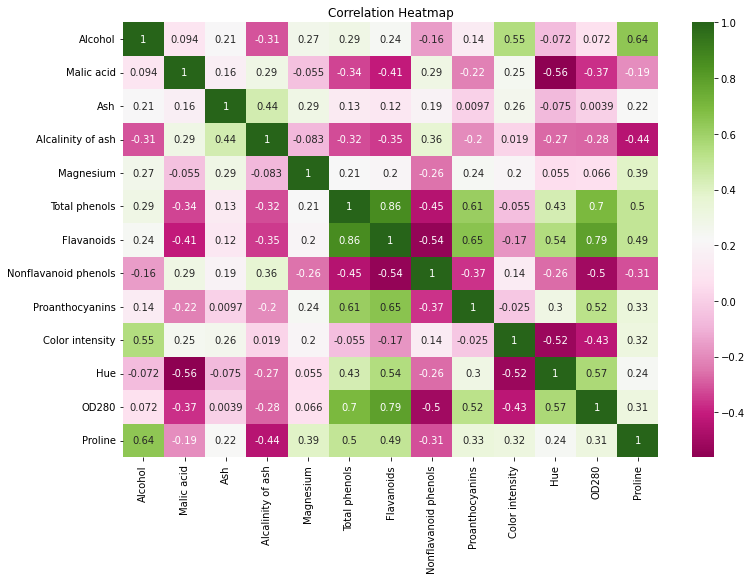

In [6]:
#Try visualise data with correlation heatmap 

#Correlation table 
x.corr()

plt.figure(figsize = (12,8))
sns.heatmap(x.corr(), annot = True, cmap = "PiYG")
plt.title('Correlation Heatmap')

In [7]:
print("Three pairs of attributes which have largest correlation =")
print("(Total phenols + Flavonoids(0.86)), (Flavonoids + OD280(0.79)) & (Total phenols + OD280 (0.7))")

Three pairs of attributes which have largest correlation =
(Total phenols + Flavonoids(0.86)), (Flavonoids + OD280(0.79)) & (Total phenols + OD280 (0.7))


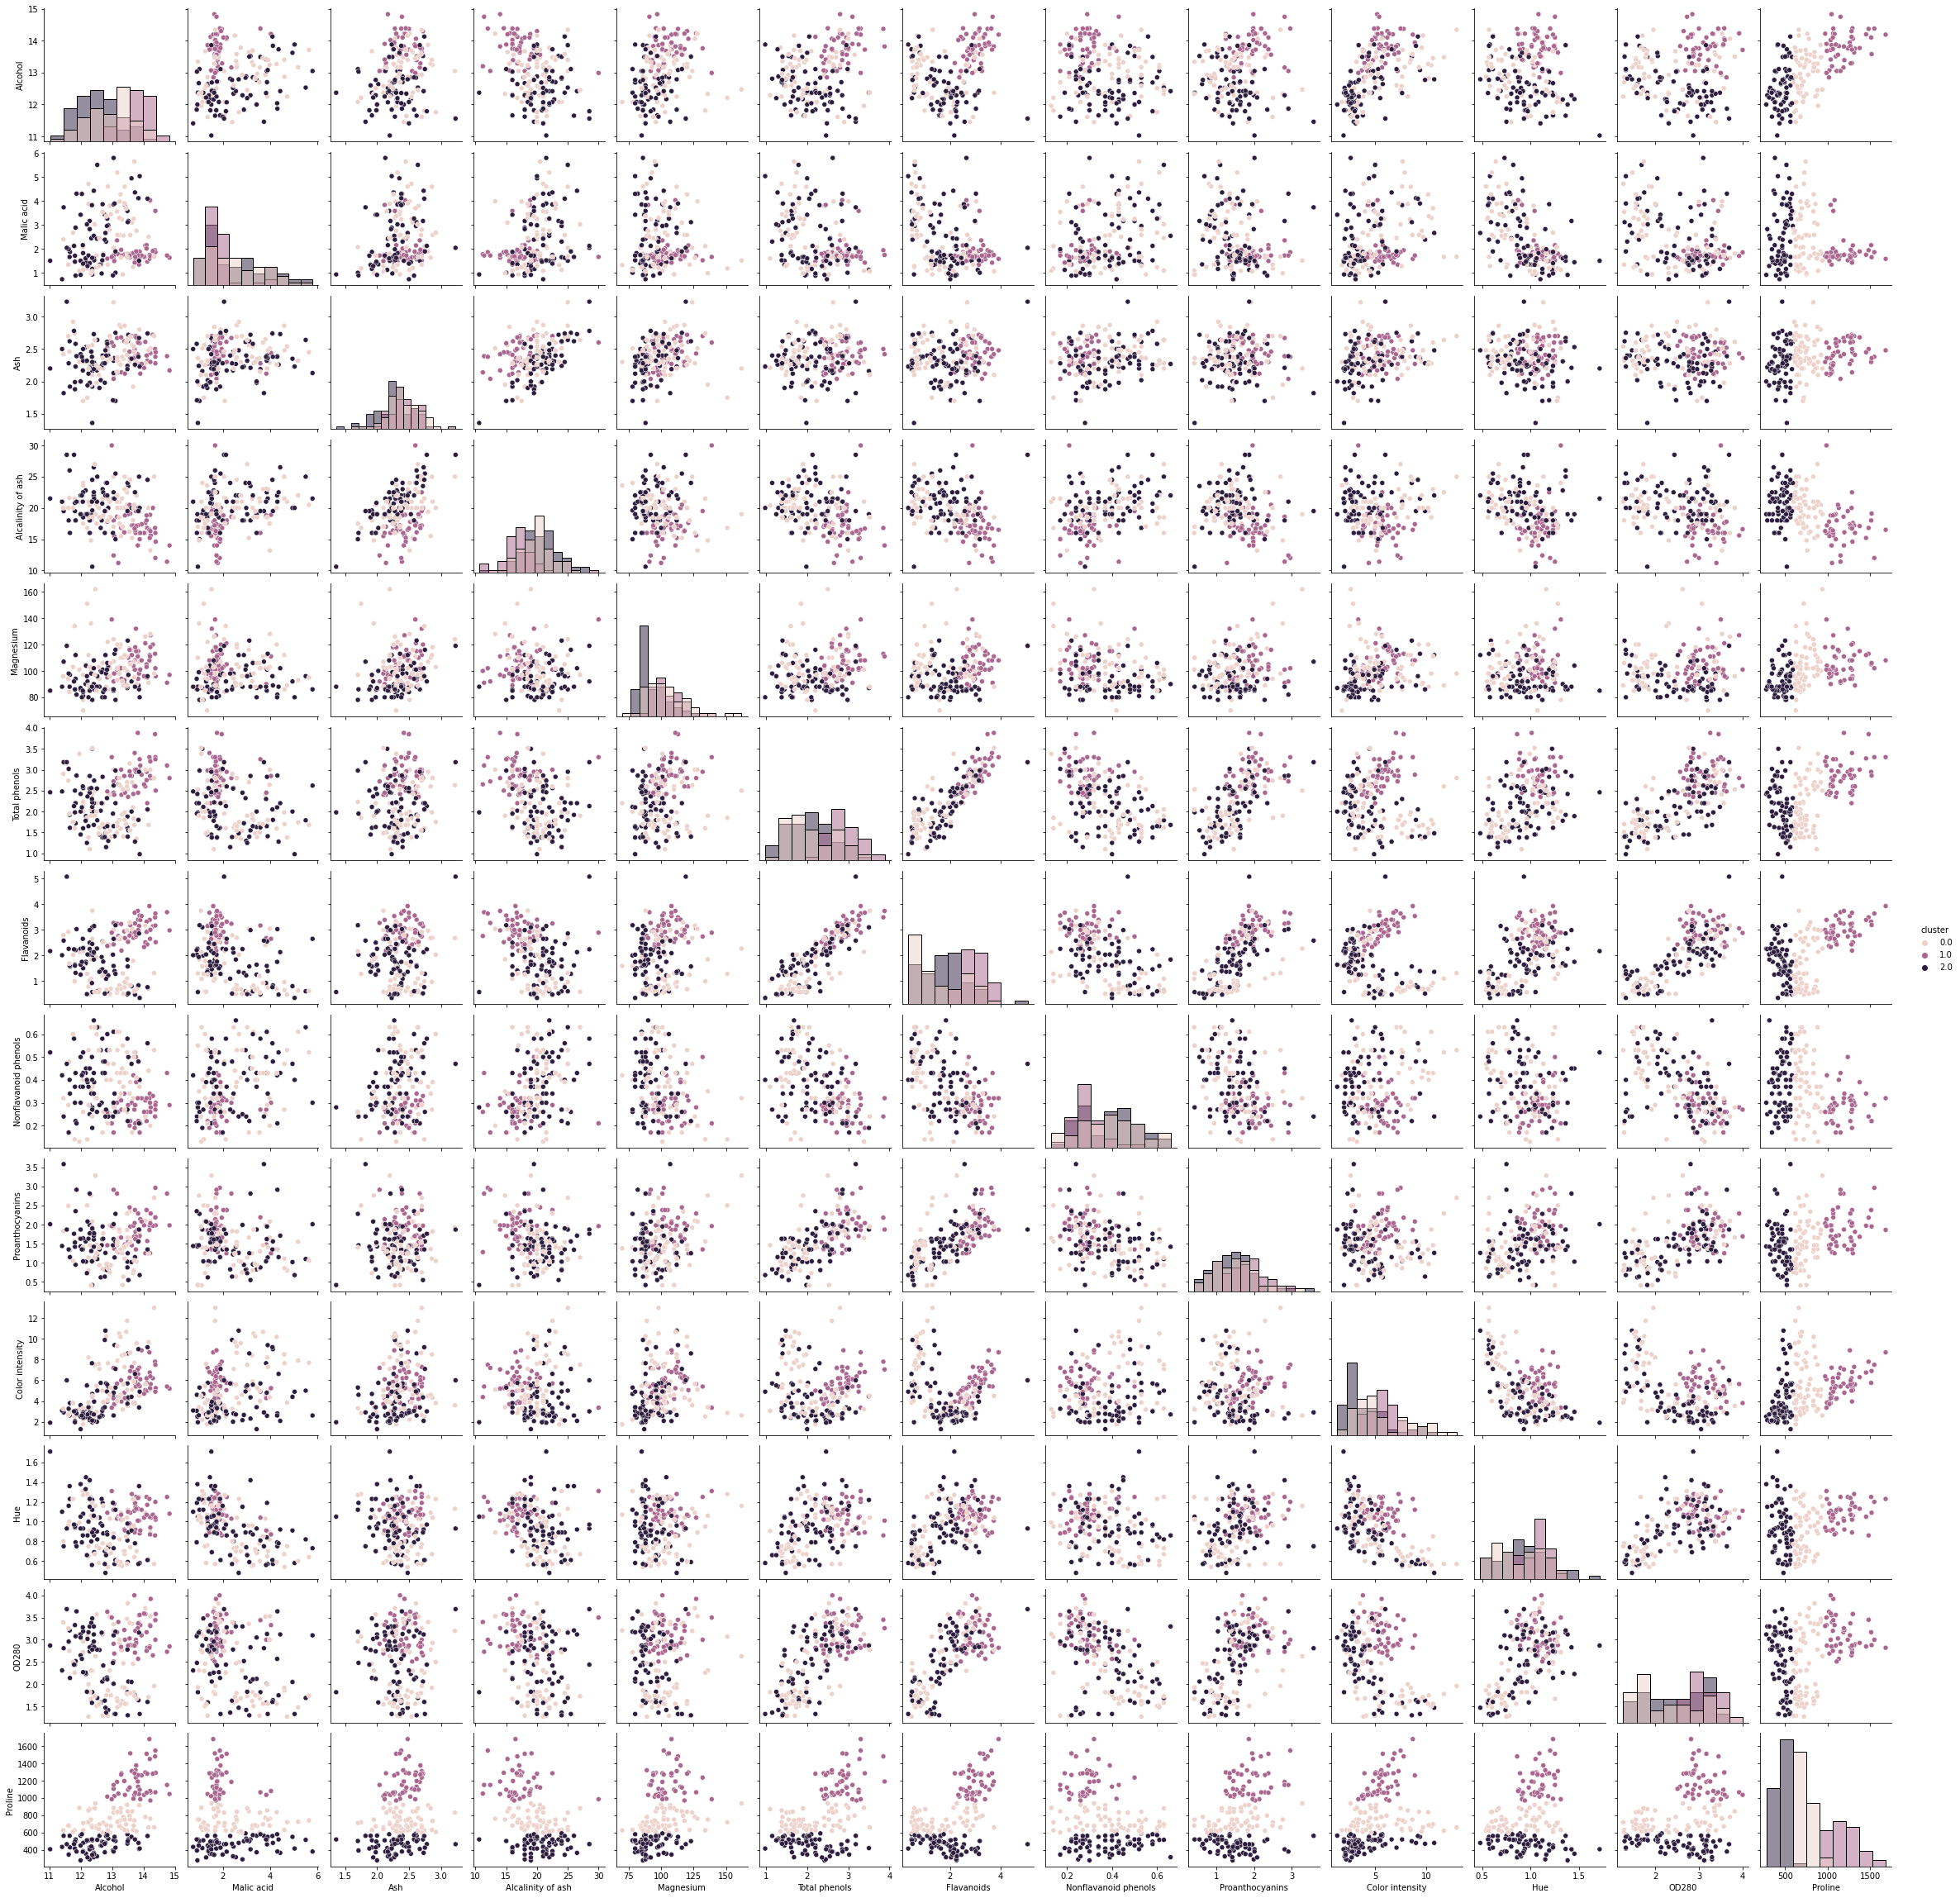

In [8]:
#Use kMeans with k = 3 to cluster the normalised 
#Use pairplot to visualised the wine attributes with their cluster 

kMeansClustering = KMeans(n_clusters = 3, random_state = 0)
res = kMeansClustering.fit_predict(x)

x["cluster"] = kMeansClustering.labels_.astype('float64')
sns_plot = sns.pairplot(x, hue = "cluster", diag_kind = "hist")

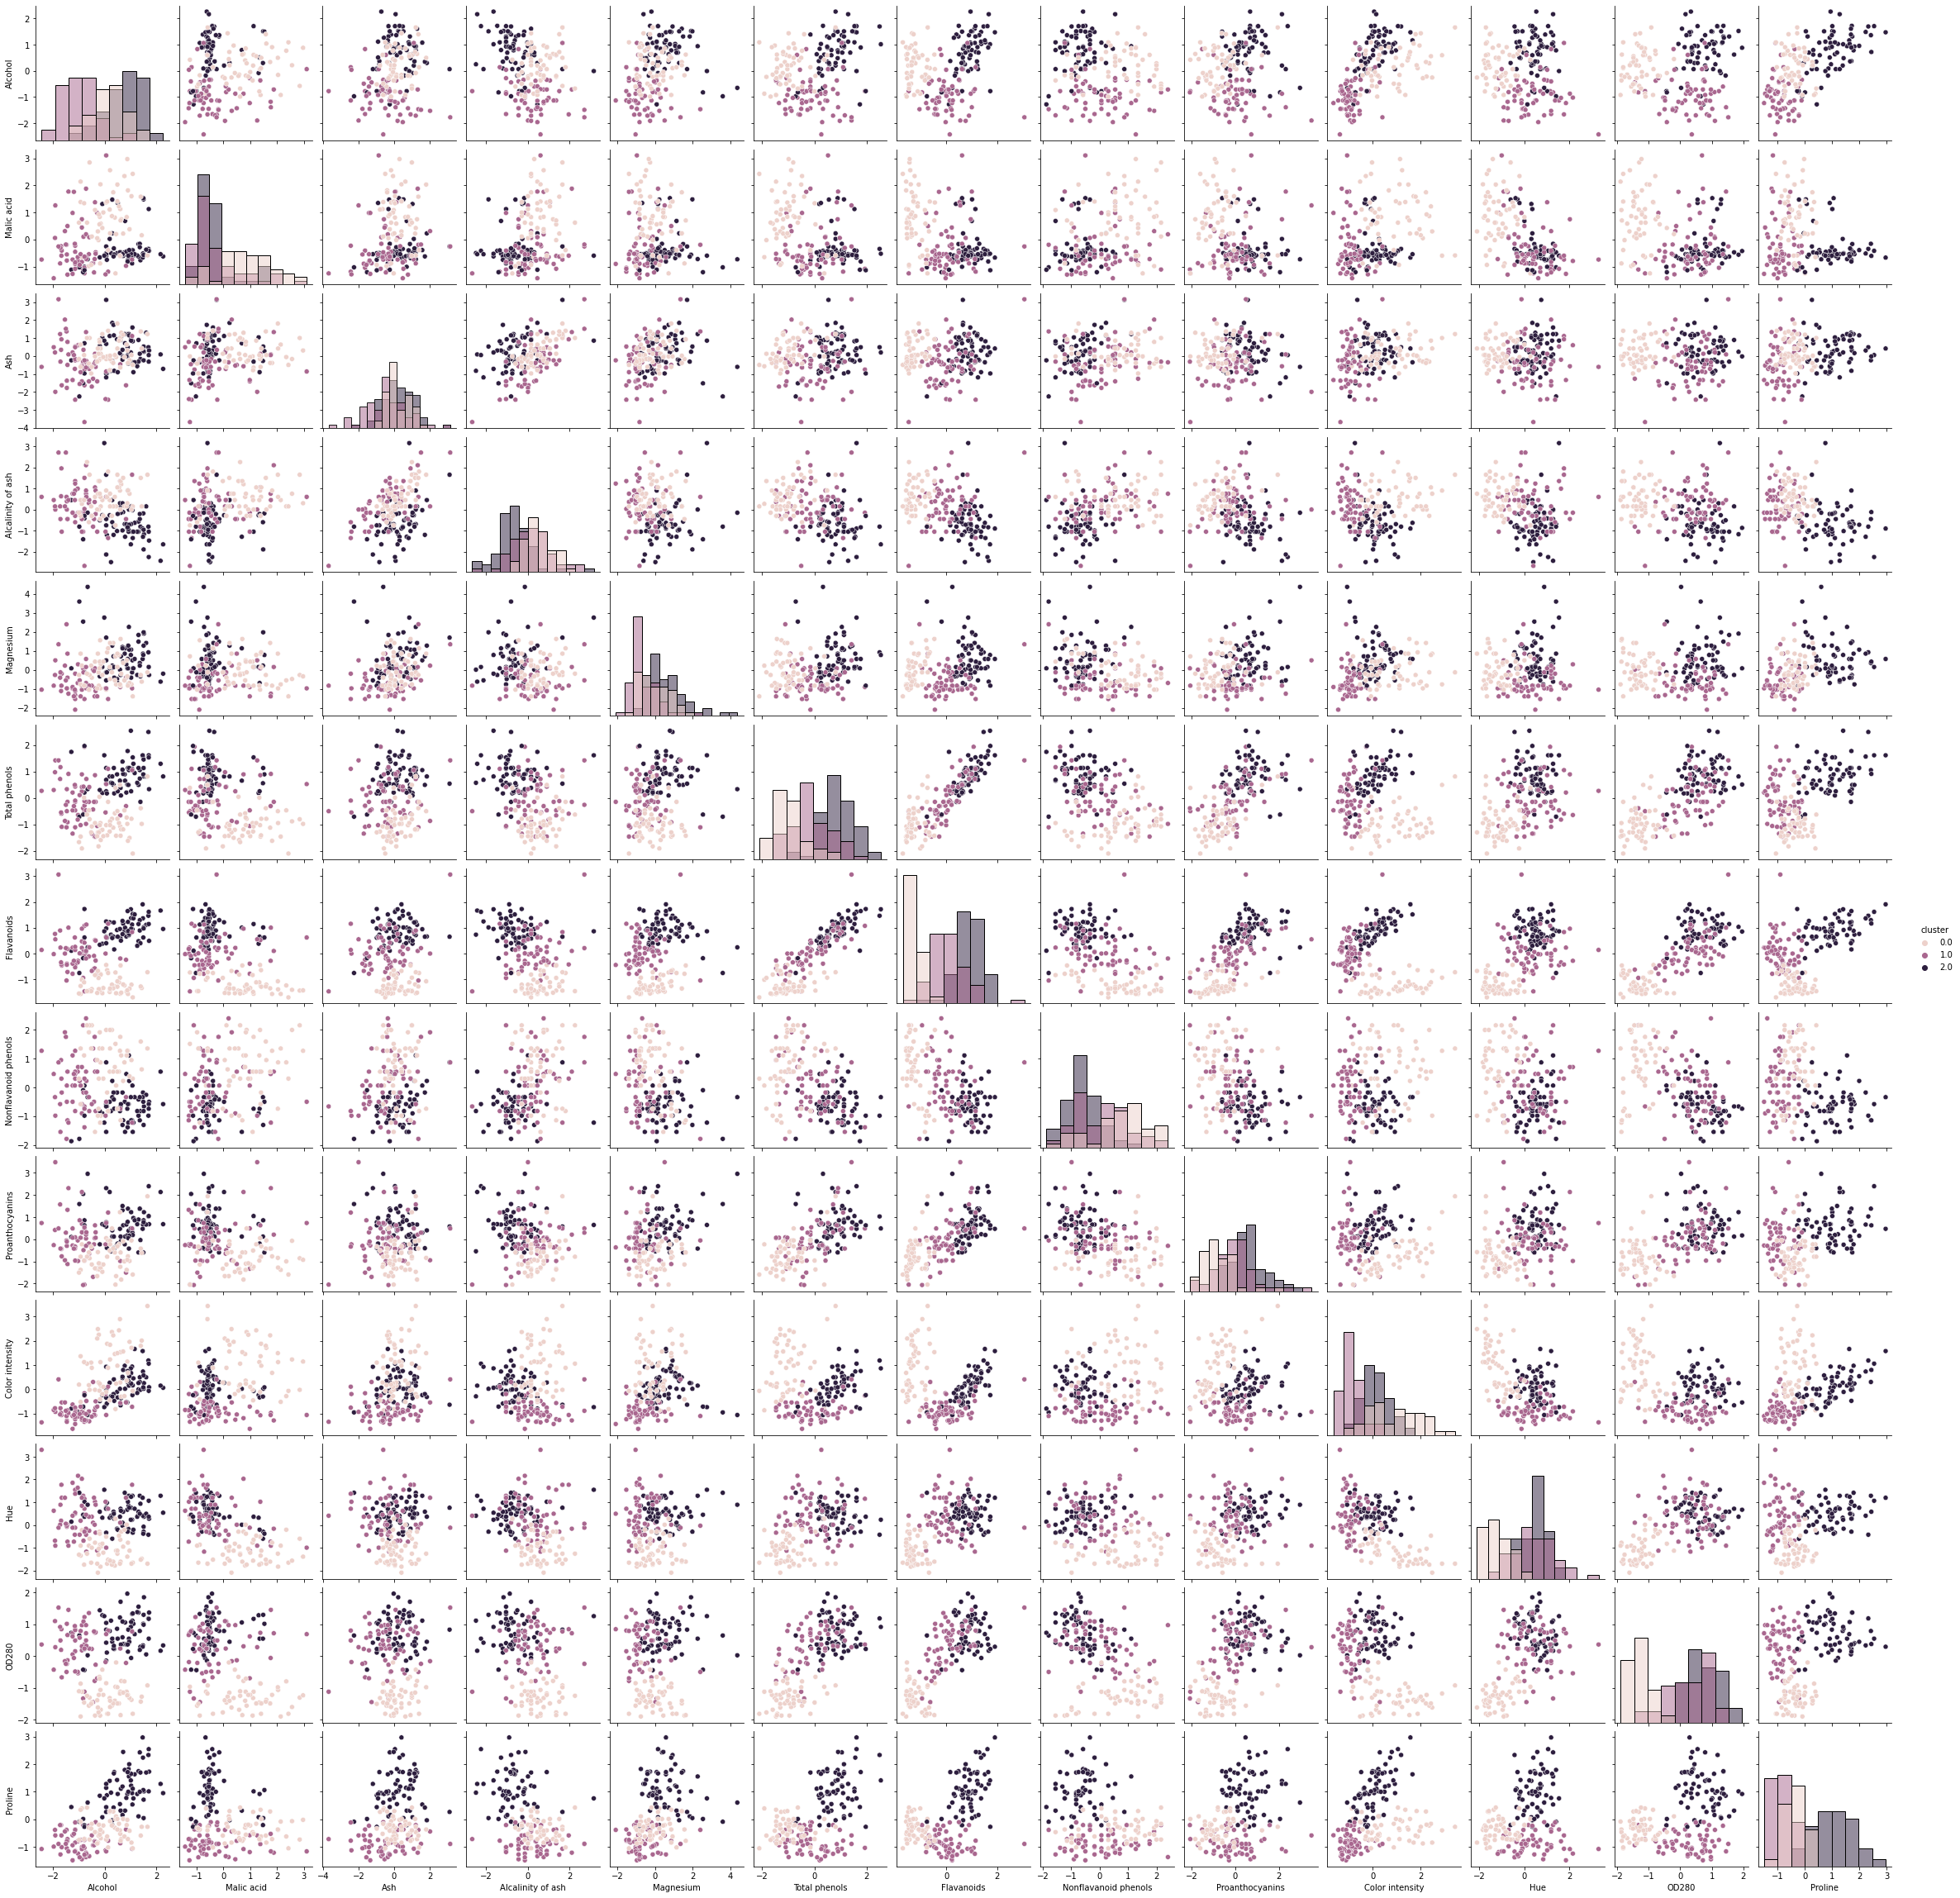

In [9]:
#Normalise the data by removing the mean and scaling to unit variance using 'preprocessing.StandardScaler' and do kMeans again
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(x)
x_scaled_array = standardScaler.transform(x)
normalisedData = pd.DataFrame(x_scaled_array, columns = x.columns)

kMeansClustering = KMeans(n_clusters = 3, random_state = 0)
res = kMeansClustering.fit_predict(normalisedData)

normalisedData["cluster"] = kMeansClustering.labels_.astype('float64')
sns_plot = sns.pairplot(normalisedData, hue = "cluster", diag_kind = "hist")

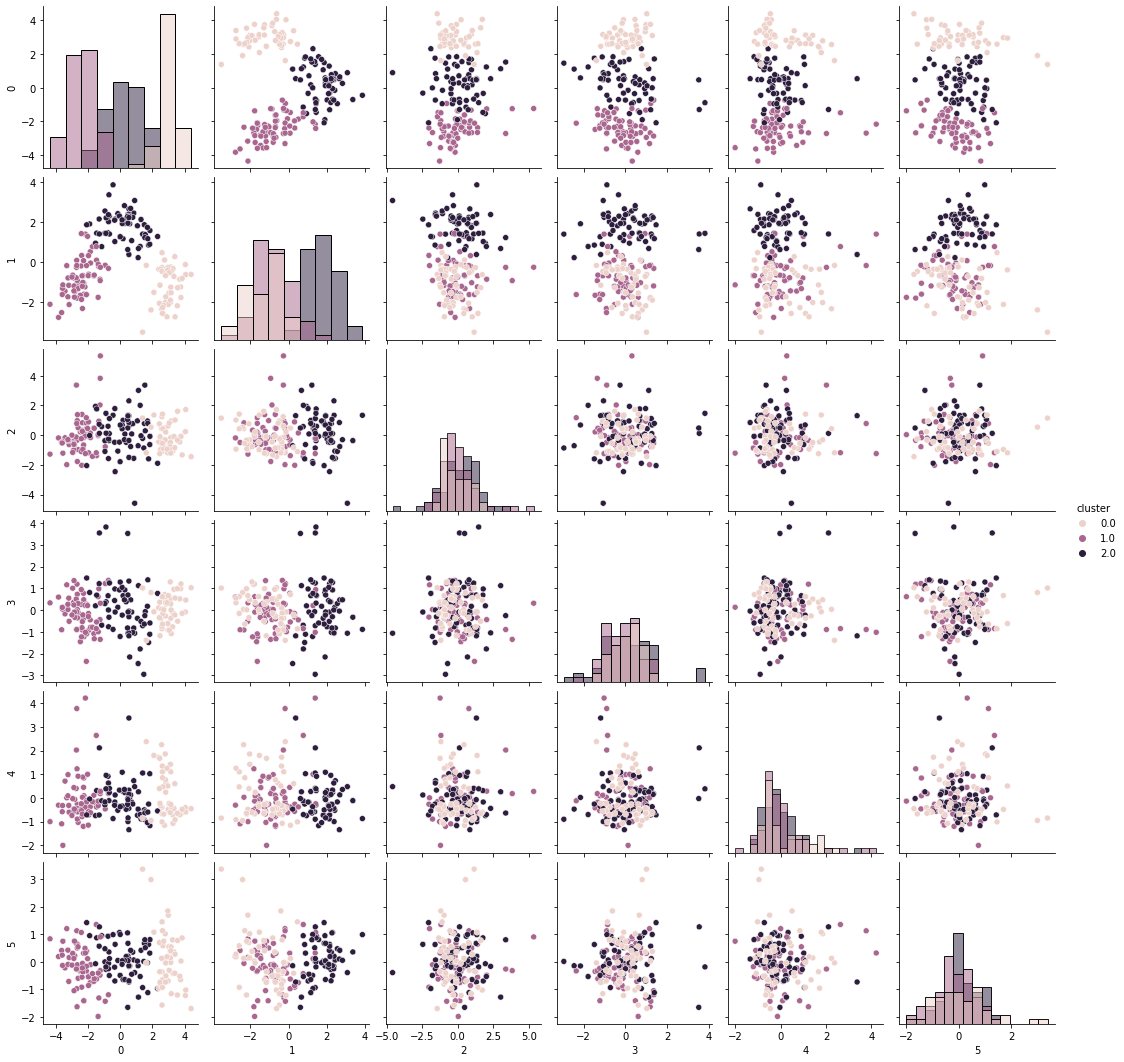

In [10]:
from sklearn.decomposition import PCA 

#Apply PCA with 6 components for the normalized data 
pca = PCA(n_components = 6)
principalComponents = pca.fit_transform(normalisedData)

principalDf = pd.DataFrame(data = principalComponents)

#Then apply kMeans clustering
kMeansClustering = KMeans(n_clusters = 3, random_state = 0)
res = kMeansClustering.fit_predict(principalDf)

principalDf["cluster"] = kMeansClustering.labels_.astype('float64')
sns_plot = sns.pairplot(principalDf, hue = "cluster", diag_kind = "hist")

In [11]:
#Use adjusted_rand_score in sklearn.metrics.cluster to calcualte the scores of original kMeans and kMeans after PCA
from sklearn.metrics.cluster import adjusted_rand_score

adjusted_rand_score(y, principalDf['cluster'])

0.8617967592137037

In [12]:
print("Perfectly matching labelings have a score of 1")
print("Therefore score of 0.86 means that after PCA, wine still has accurate labels")

Perfectly matching labelings have a score of 1
Therefore score of 0.86 means that after PCA, wine still has accurate labels
